Analyze Photos for features of blur

https://www.kaggle.com/kwentar/blur-dataset


Load in: Our data set


CNN Approach

In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, UpSampling2D, ZeroPadding2D

import pandas as pd
import matplotlib.pyplot as plt

In [32]:
from PIL import Image, ImageOps
from os import listdir

data = []
count = 0

#initialize our training
training = np.zeros(shape=(65,750,500))

for file in sorted(listdir("blur_dataset_scaled/defocused_blurred")):
    if not file.endswith(".JPG"): continue
    image = Image.open("blur_dataset_scaled/defocused_blurred/" + file)
    
    
    
    #Converts our images to gray scale
    image.convert("L").save("blur_dataset_scaled/defocused_blurred/" + file)
    #image.save("blur_dataset_scaled/defocused_blurred/" + file)
    
    
    #print(np.asarray(image))
    #image = image.resize(1024,768)
    #width, height = image.size
    
    #print((width, height))
    
    
    
    """image_sequence = image.getdata()
    image_array = np.array(image_sequence)
    image_array = image_array.reshape(width, height)"""
    
    if width == 2048 and height == 1365:
        image_new = image.resize((750,500), Image.ANTIALIAS)
        image_sequence = image_new.getdata()
        image_array = np.array(image_sequence)
        image_array = image_array.reshape(750, 500)
        
        #image_array = image_array.reshape(width, 1364)
        print(image_array.shape)
        training[count, :, :] = image_array
        count += 1
    #print(image_array.shape)
    #print(file)
    
    
    #data.append(image_array)
    
print(count)
#image_array.shape

"""

Found a way to make all of the images smaller with resize so now I need to save them

"""

(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)
(750, 500)


IndexError: index 65 is out of bounds for axis 0 with size 65

We have 76 Images in total \
We have 65 Images are all the same size (2048, 1365)

Properly Scale all our images to the same size
-----
Gray scale our test images so that the network can go
----

In [33]:
training.shape

(65, 750, 500)

Saved our images so that we dont have to run through everything again (ABOVE)
----

In [34]:
np.save("Defocused_Image_Small", training)

In [4]:
x_training = np.load("Defocused_Image_Small.npy") #defocused blur
x_testing = np.load("Sharp_Image_Small.npy") #clear images
#print(loaded_array)

SPLIT DATA (Testing/Training)
---

In [5]:
x_testing, x_train = x_training[:5], x_training[5:]
print(x_train.shape)

(60, 750, 500)


In [6]:
import numpy as np

x_train = x_training.astype('float32') / 255.
x_test = x_testing.astype('float32') / 255.
"""x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))"""
print(x_train.shape)
print(x_test.shape)

(65, 750, 500)
(5, 750, 500)


In [7]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
K = keras.backend

#3565

In [11]:
"""input_img = keras.Input(shape=(2795520,))
#encoded = Dense(1024, activation='relu')(input_img)
encoded = Dense(256, activation='relu')(input_img)
#encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)

encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
#decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(256, activation='relu')(decoded)
#encoded = Dense(1024, activation='relu')(decoded)
decoded = Dense(2795520, activation='sigmoid')(decoded)
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.summary()"""

"input_img = keras.Input(shape=(2795520,))\n#encoded = Dense(1024, activation='relu')(input_img)\nencoded = Dense(256, activation='relu')(input_img)\n#encoded = Dense(128, activation='relu')(encoded)\nencoded = Dense(64, activation='relu')(encoded)\n\nencoded = Dense(32, activation='relu')(encoded)\n\ndecoded = Dense(64, activation='relu')(encoded)\n#decoded = Dense(128, activation='relu')(decoded)\ndecoded = Dense(256, activation='relu')(decoded)\n#encoded = Dense(1024, activation='relu')(decoded)\ndecoded = Dense(2795520, activation='sigmoid')(decoded)\nautoencoder = keras.Model(input_img, decoded)\nautoencoder.compile(optimizer='adam', loss='binary_crossentropy')\n\nautoencoder.summary()"

In [12]:
"""autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=1,
                shuffle=True)"""

'autoencoder.fit(x_train, x_train,\n                epochs=50,\n                batch_size=1,\n                shuffle=True)'

In [13]:
"""import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_test)

n = 4
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(2048, 1365))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(2048, 1365))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()"""

'import matplotlib.pyplot as plt\n\ndecoded_imgs = autoencoder.predict(x_test)\n\nn = 4\nplt.figure(figsize=(20, 4))\nfor i in range(1, n + 1):\n    # Display original\n    ax = plt.subplot(2, n, i)\n    plt.imshow(x_test[i].reshape(2048, 1365))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\n\n    # Display reconstruction\n    ax = plt.subplot(2, n, i + n)\n    plt.imshow(decoded_imgs[i].reshape(2048, 1365))\n    plt.gray()\n    ax.get_xaxis().set_visible(False)\n    ax.get_yaxis().set_visible(False)\nplt.show()'

242s 4s/step - loss: 28429863853490176.0000

In [8]:
Input_img = keras.Input(shape=(750,500, 1))  
    
#encoding architecture
x1 = Conv2D(256, (10, 10), activation='relu', padding='same')(Input_img)
x2 = Conv2D(128, (10, 10), activation='relu', padding='same')(x1)
x2 = MaxPooling2D( (2, 2))(x1)
encoded = Conv2D(64, (3, 3), activation='relu', padding='same')(x2)

# decoding architecture
x3 = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x3 = UpSampling2D((2, 2))(x3)
#x3 = ZeroPadding2D(padding=((0,0),(1,0)))(x3)
x2 = Conv2D(128, (10, 10), activation='relu', padding='same')(x3)
x1 = Conv2D(256, (10, 10), activation='relu', padding='same')(x3)
decoded = Conv2D(1, (3, 3), padding='same')(x1)

autoencoder = keras.Model(Input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 750, 500, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 750, 500, 256)     25856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 375, 250, 256)     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 375, 250, 64)      147520    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 375, 250, 64)      36928     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 750, 500, 64)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 750, 500, 256)     163865

In [9]:
#early_stopper = EarlyStopping( min_delta=0.0001, patience=4, verbose=1, mode='auto')
#need to add validation


a_e = autoencoder.fit(x_training, x_training,
            epochs=50,
            batch_size=1,
            shuffle=True,
            )

Epoch 1/50
65/65 [==============================] - 550s 8s/step - loss: 19912.5605
Epoch 2/50
65/65 [==============================] - 550s 8s/step - loss: 223.4052
Epoch 3/50
65/65 [==============================] - 550s 8s/step - loss: 148.8340
Epoch 4/50
65/65 [==============================] - 550s 8s/step - loss: 90.5297
Epoch 5/50
65/65 [==============================] - 550s 8s/step - loss: 62.3290
Epoch 6/50
65/65 [==============================] - 551s 8s/step - loss: 160.1745
Epoch 7/50
40/65 [=================>............] - ETA: 3:32 - loss: 417.0677

KeyboardInterrupt: 

OOM when allocating tensor

IndexError: index 5 is out of bounds for axis 0 with size 5

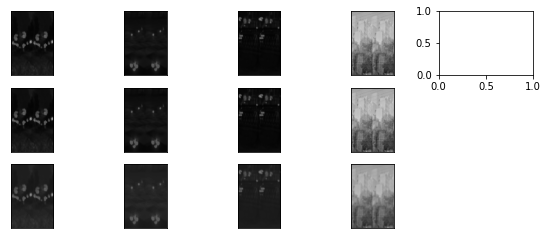

In [10]:
import matplotlib.pyplot as plt

decoded_imgs = autoencoder.predict(x_training)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(750, 500))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Display 
    #print(i+n)
    ax = plt.subplot(3,n,i+n)
    plt.imshow(x_training[i].reshape(750, 500))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display 
    ax = plt.subplot(3, n, i + n +n)
    plt.imshow(decoded_imgs[i].reshape(750, 500))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()